In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

Importing datasets manually

In [ ]:
df_red = pd.read_csv('../winequality-red.csv', sep=';')

df_white = pd.read_csv('../winequality-white.csv', sep=';')

In [64]:
df_red['color'] = 0    # per red
df_white['color'] = 1  # per white

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [65]:

X_red = df_red.drop(columns='quality')
y_red = df_red['quality']

smote = SMOTE(random_state=42)
X_red_resampled, y_red_resampled = smote.fit_resample(X_red, y_red)

In [66]:
red_wine_resampled = pd.concat([
    pd.DataFrame(X_red_resampled, columns=X_red.columns),
    pd.Series(y_red_resampled, name='quality')
], axis=1)

data = pd.concat([red_wine_resampled, df_white], ignore_index=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


## Expolaratory Data analysis

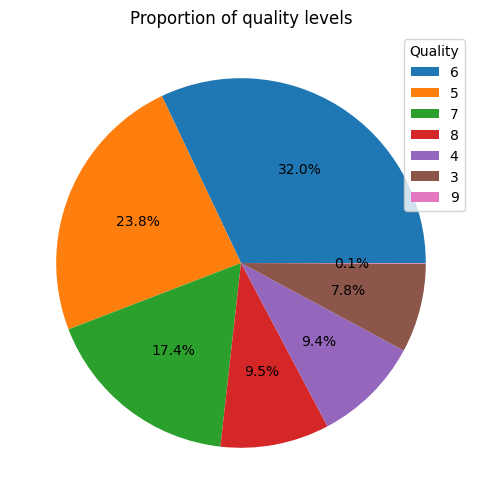

In [67]:
y = data['quality']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of quality levels')
plt.legend(labels=count.index, title="Quality", loc="best")
plt.show()

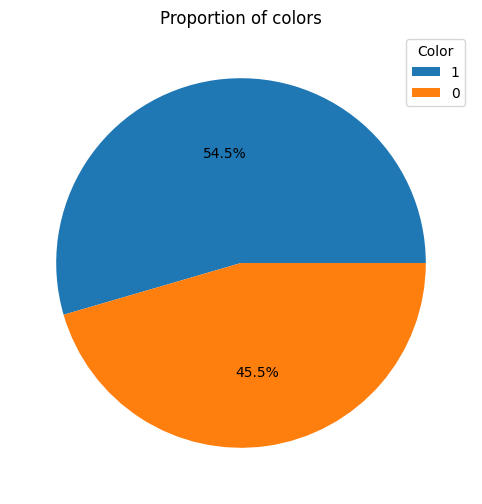

In [68]:
y = data['color']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of colors')
plt.legend(labels=count.index, title="Color", loc="best")
plt.show()

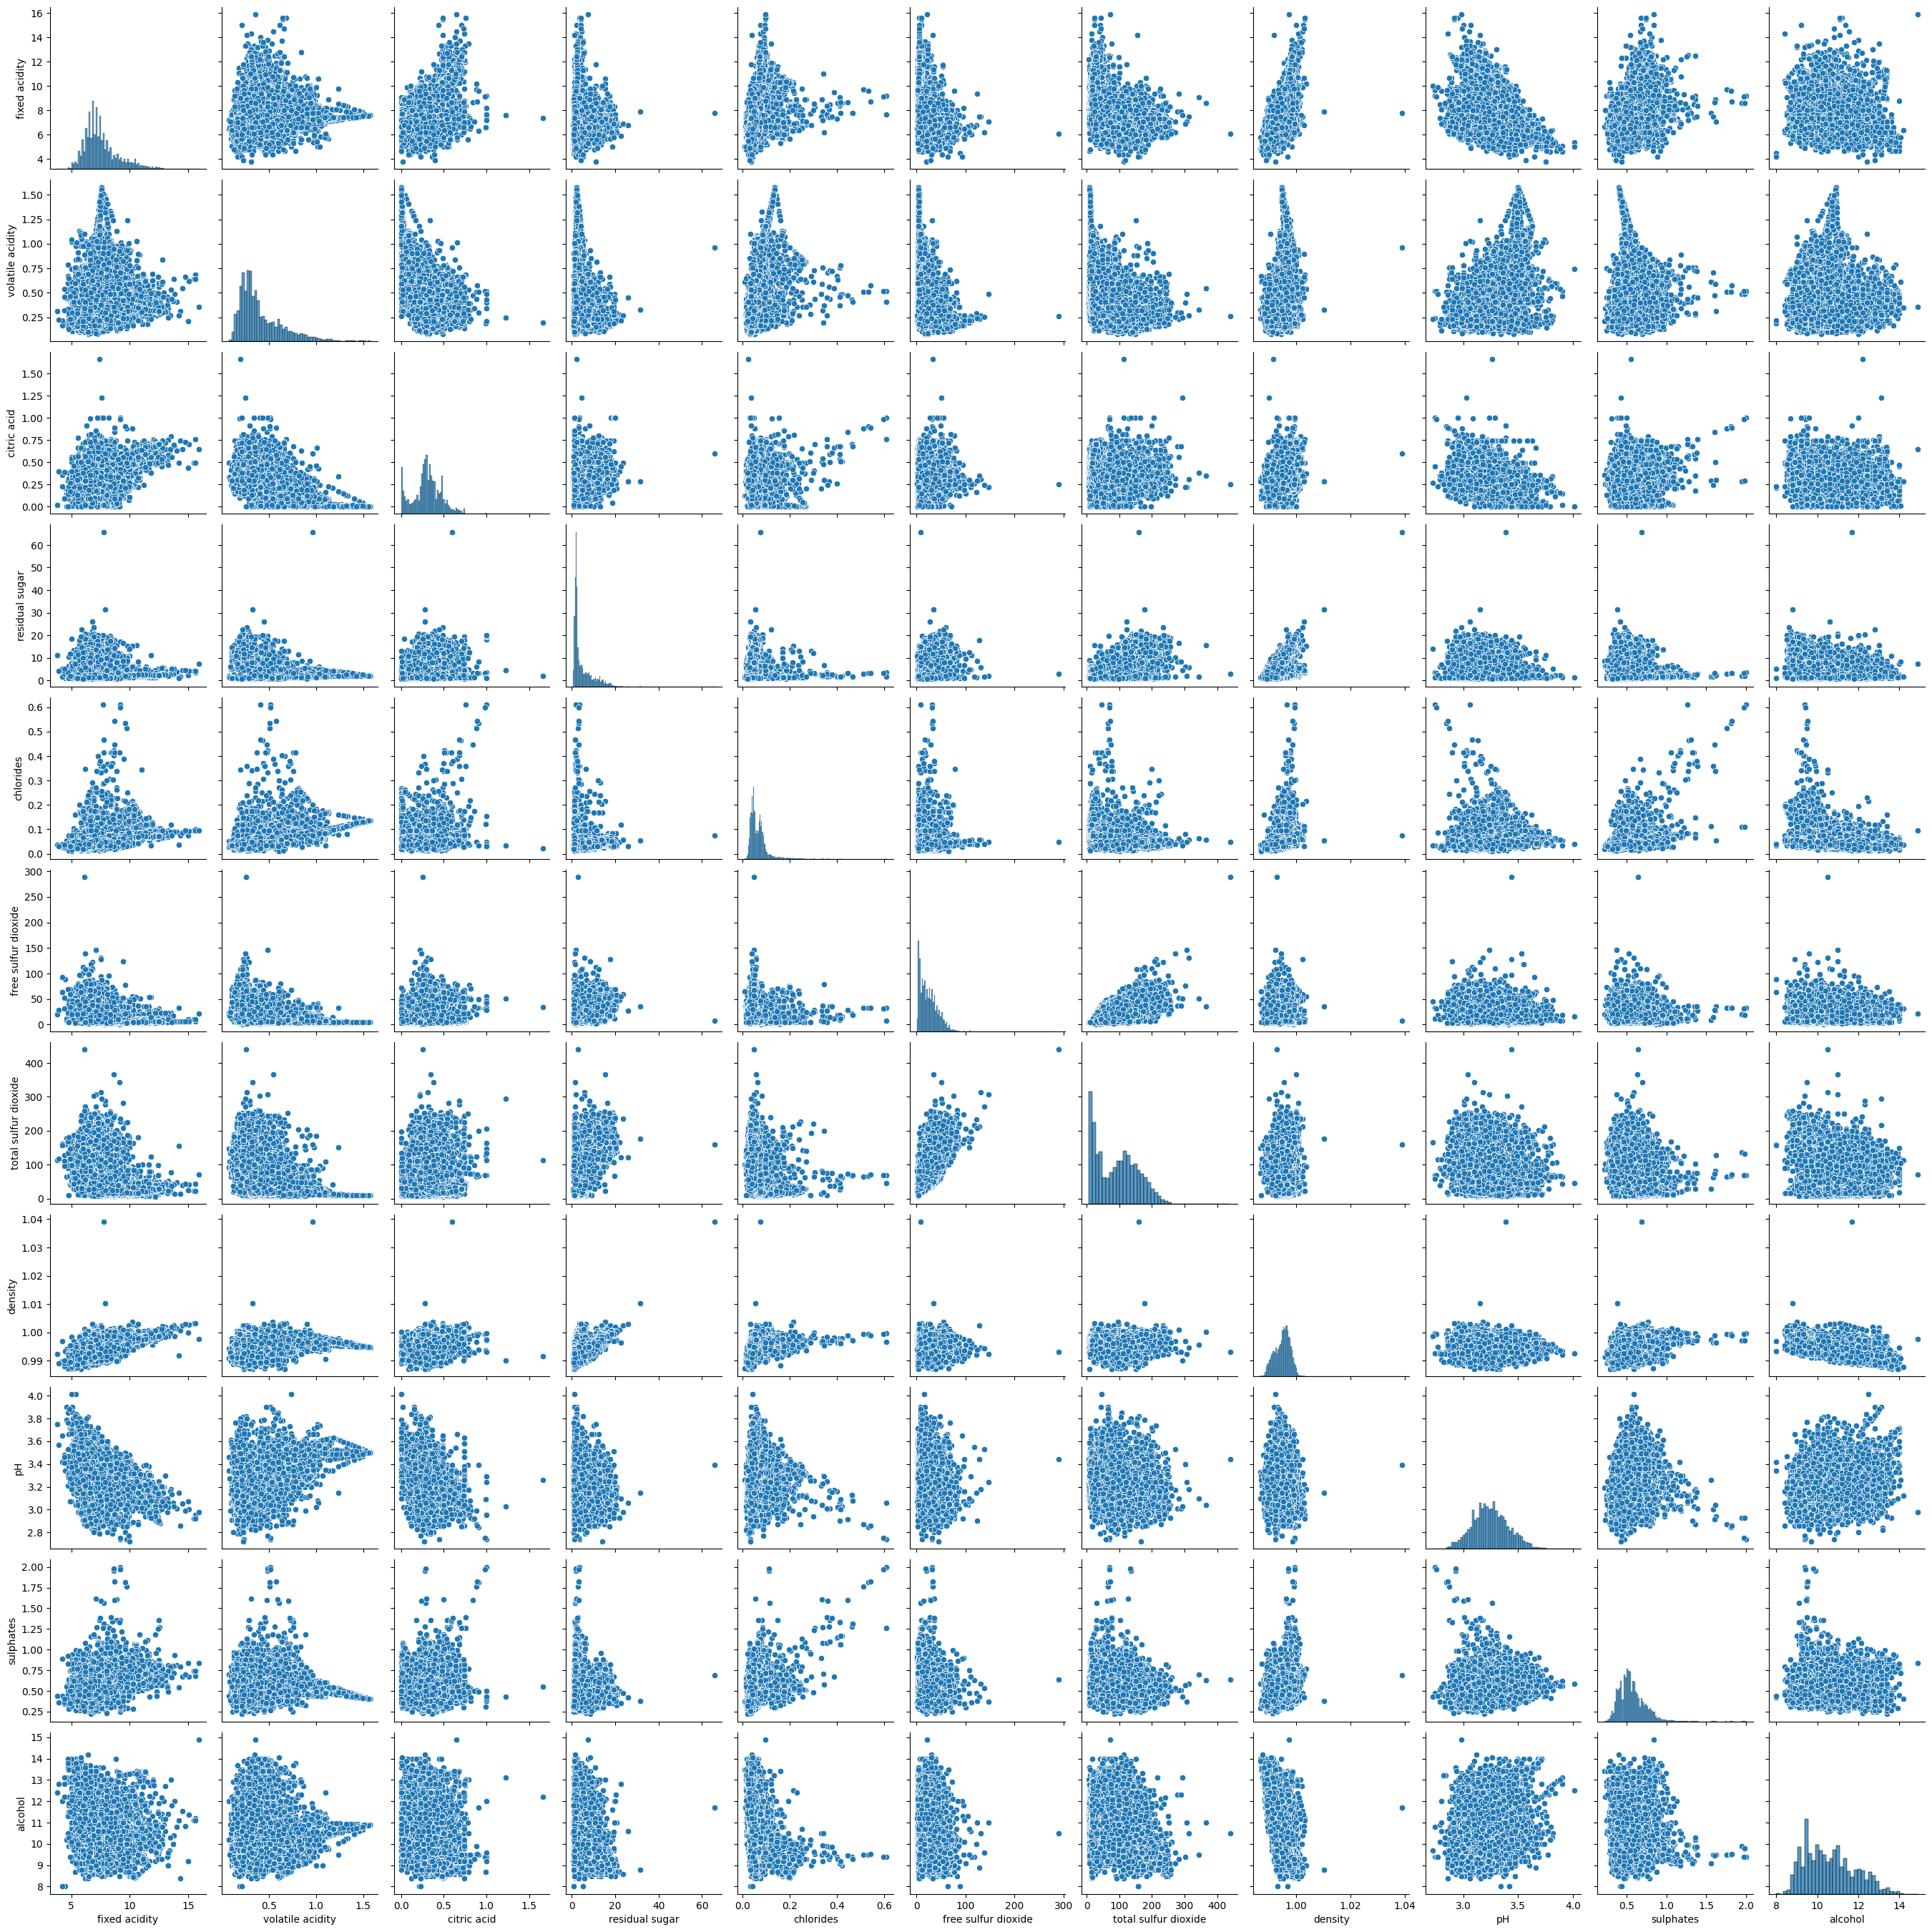

In [69]:
sns.pairplot(data.drop(columns=['quality', 'color']))

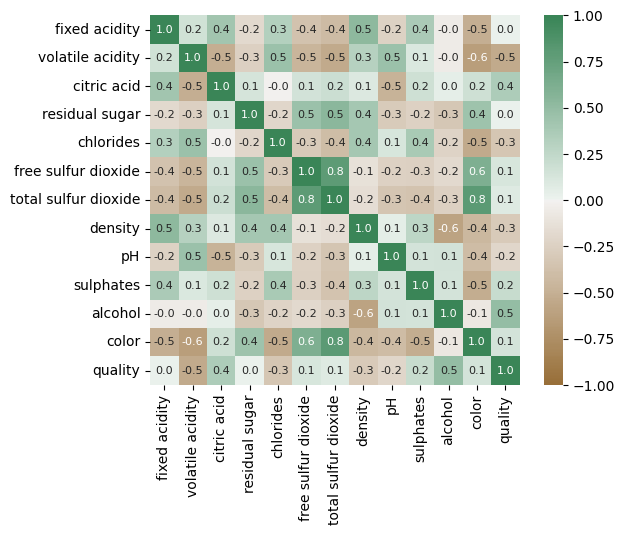

In [70]:

correlation = data.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True,
annot=True,
fmt=".1f",
annot_kws={"size": 8}
)

plt.show()

In [71]:
data['bound_sulfur_dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']

In [72]:
data = data.drop(columns = 'total sulfur dioxide')
data = data.drop(columns = 'free sulfur dioxide')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,color,quality,bound_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0,5,23.0
1,7.8,0.88,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,0,5,42.0
2,7.8,0.76,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,0,5,39.0
3,11.2,0.28,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,0,6,43.0
4,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0,5,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,0.99114,3.27,0.50,11.2,1,6,68.0
8980,6.6,0.32,0.36,8.0,0.047,0.99490,3.15,0.46,9.6,1,5,111.0
8981,6.5,0.24,0.19,1.2,0.041,0.99254,2.99,0.46,9.4,1,6,81.0
8982,5.5,0.29,0.30,1.1,0.022,0.98869,3.34,0.38,12.8,1,7,90.0


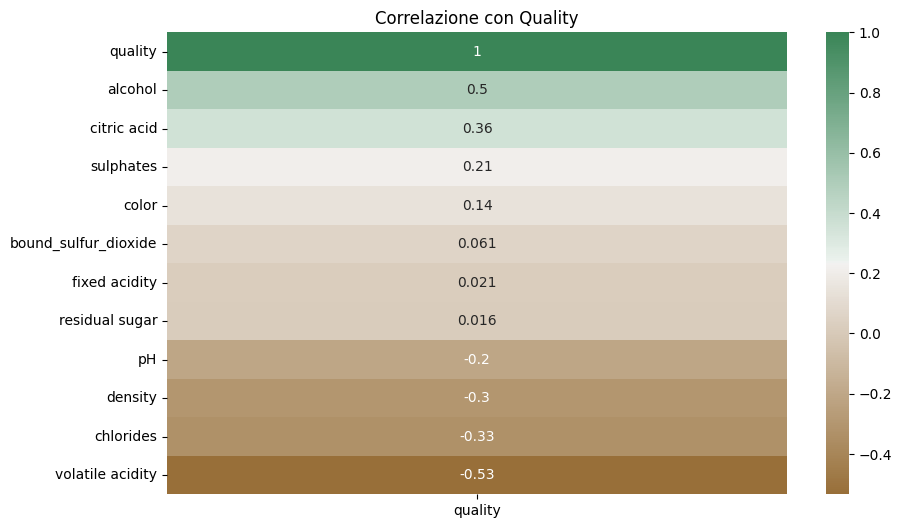

In [73]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['quality']].sort_values(by='quality', ascending=False), annot=True, cmap=sns.diverging_palette(50, 500, n=500))
plt.title('Correlazione con Quality')
plt.show()

bound dioxide, fixed acidity e residual sugar si possono gettare

In [74]:
data = data.drop(columns=['bound_sulfur_dioxide', 'residual sugar', 'fixed acidity'])


dovrei anche fare il test di multicollinearità

Prima di fare PCA scalo i valori continui

In [75]:
X = data.drop(columns='quality')
exclude = ['color']

to_scale = [col for col in X.columns if col not in exclude]

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[to_scale] = scaler.fit_transform(X[to_scale])

X


,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,color
0,0.70,0.00,0.076,0.99780,3.51,0.56,9.4,0
1,0.88,0.00,0.098,0.99680,3.20,0.68,9.8,0
2,0.76,0.04,0.092,0.99700,3.26,0.65,9.8,0
3,0.28,0.56,0.075,0.99800,3.16,0.58,9.8,0
4,0.70,0.00,0.076,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...
8979,0.21,0.29,0.039,0.99114,3.27,0.50,11.2,1
8980,0.32,0.36,0.047,0.99490,3.15,0.46,9.6,1
8981,0.24,0.19,0.041,0.99254,2.99,0.46,9.4,1
8982,0.29,0.30,0.022,0.98869,3.34,0.38,12.8,1


In [76]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = data['quality'].values

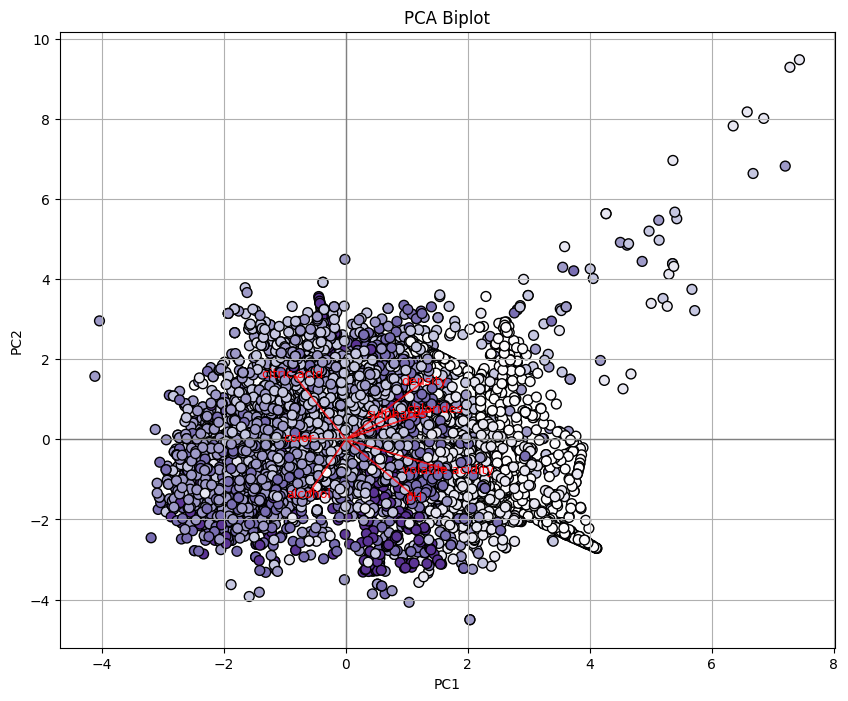

In [77]:
# so che non si vede, ma questa è comunque la cmap con cui si vede di piu
loadings = pca.components_.T 
feature_names = X_scaled.columns

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Purples', edgecolor='k', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")


for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              loadings[i, 0] * 3,
              loadings[i, 1] * 3,
              color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2,
             feature, color='r', ha='center', va='center', fontsize=9)

plt.grid(True)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.show()


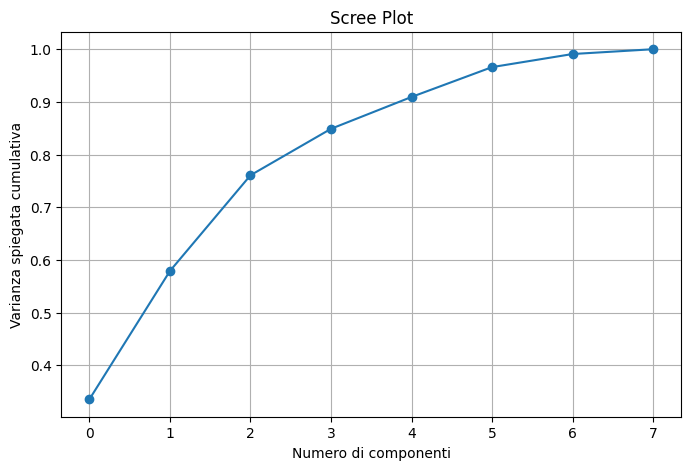

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [85]:
pve = pca_full.explained_variance_ratio_
for i, v in enumerate(pve):
    print(f"PC{i+1}: {v:.4f}")

print(pca_full.explained_variance_ratio_[0:2].sum())


PC1: 0.3357
PC2: 0.2435
PC3: 0.1816
PC4: 0.0882
PC5: 0.0604
PC6: 0.0567
PC7: 0.0248
PC8: 0.0091
0.5791993926756945


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle= True)

X_train

,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,color
87,0.490000,0.260000,0.062000,0.996600,3.390000,0.640000,9.600000,0
3393,0.291538,0.371538,0.076154,0.994994,3.343231,0.773692,12.056923,0
2884,0.374654,0.302926,0.059122,0.995935,3.286866,0.563940,11.197929,0
401,0.260000,0.300000,0.059000,0.994900,3.290000,0.470000,10.800000,0
2465,0.516777,0.988028,0.597637,0.999545,2.753353,1.970071,9.404605,0
...,...,...,...,...,...,...,...,...
5734,0.300000,0.490000,0.045000,0.994200,3.400000,0.590000,10.200000,1
5191,0.320000,0.450000,0.028000,0.992200,3.510000,0.490000,11.500000,1
5390,0.590000,0.710000,0.038000,1.000000,2.950000,0.750000,9.300000,1
860,0.620000,0.060000,0.077000,0.997460,3.510000,0.540000,9.500000,0


# EXPERIMENTS
first we load the models

In [82]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

then we define the parameters for each model

In [83]:
param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10]
    },
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'classifier__alpha': [0.0001, 0.001]
    },
    'Decision Tree': {
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

In [84]:
results = {}

for name, model in models.items():
    print(f"CHECK FOR: {name}")

    if name == 'MLP':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid.fit(X_train, y_train)
        results[name] = (grid.best_score_, grid.best_params_)
        print(f"Best Score: {grid.best_score_}")
        print(f"Best Params: {grid.best_params_}")

    else:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)

        if name == 'SVM':
            model = SVC(kernel='linear')

        selector = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='f1_weighted')
        X_train_sel = selector.fit_transform(X_train_scaled, y_train)
        print(f"Feature selezionate: {selector.n_features_}")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # ridondante ma ok per sicurezza
            ('classifier', model)
        ])
        grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid.fit(X_train_sel, y_train)
        results[name] = (grid.best_score_, grid.best_params_)
        print(f"Best Score: {grid.best_score_}")
        print(f"Best Params: {grid.best_params_}")

best_model = max(results, key=lambda k: results[k][0])
print(f"Best model: {best_model} with score {results[best_model][0]}")


CHECK FOR: SVM


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Feature selezionate: 8


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.6260960138813825
Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
CHECK FOR: Logistic Regression


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Feature selezionate: 8


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.5299752516408648
Best Params: {'classifier__C': 1}
CHECK FOR: MLP


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.6488793049349205
Best Params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100, 50)}
CHECK FOR: Decision Tree


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Feature selezionate: 7


c:\Users\micha\Desktop\Materie\Rossi-Manno\rossi-manno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.6326154850955146
Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Best model: MLP with score 0.6488793049349205


## Using PCA

da fare:
- inexing scree plot from 0
- refactoring code
- add markdown cells
- smote for classes balances and reduce number of classes based on percentage of samples described